<a href="https://colab.research.google.com/github/MohamedOsama16/Projects/blob/main/SVM_With_Different_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Dataset

In [27]:
file_path = '/content/car_evaluation.csv'
data = pd.read_csv(file_path)

## Data Visualization

In [28]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


## Preprocess the dataset

In [29]:
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.iloc[:, :-1]
y = data_encoded.iloc[:, -1]

## Prepare Data for Model Training

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define kernels

In [31]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]

## Train SVM Models with Different Kernels

In [32]:
results = []

In [33]:
for kernel in kernels:
    for C in C_values:
        model = SVC(kernel=kernel, C=C, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({'Kernel': kernel, 'C': C, 'Accuracy': accuracy})

In [34]:
results_df = pd.DataFrame(results)

## Model Evaluation

In [35]:
# Display the results
print("\nSVM Kernel Performance:")
print(results_df)


SVM Kernel Performance:
     Kernel     C  Accuracy
0    linear   0.1  0.950867
1    linear   1.0  0.982659
2    linear  10.0  0.994220
3      poly   0.1  0.950867
4      poly   1.0  0.979769
5      poly  10.0  0.994220
6       rbf   0.1  0.950867
7       rbf   1.0  0.988439
8       rbf  10.0  0.994220
9   sigmoid   0.1  0.950867
10  sigmoid   1.0  0.962428
11  sigmoid  10.0  0.953757


## Results visualization

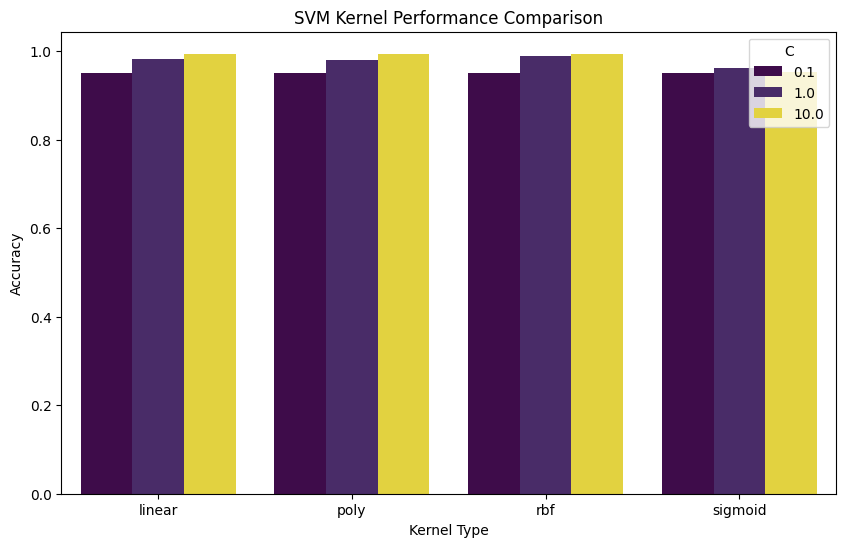

In [36]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Kernel', y='Accuracy', hue='C', palette='viridis')
plt.title('SVM Kernel Performance Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Kernel Type')
plt.legend(title='C')
plt.show()
